In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.6f' % x)

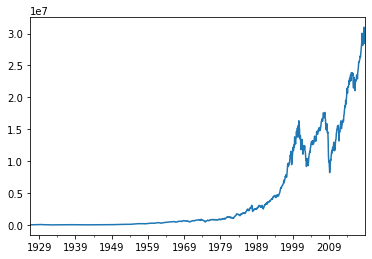

In [2]:
returns = lib.readcsv('data\ind30_m_vw_rets.csv')
returns.columns = returns.columns.str.strip()

size = lib.readcsv('data\ind30_m_size.csv', percentage = False)
size.columns = size.columns.str.strip()

firms = lib.readcsv('data\ind30_m_nfirms.csv', percentage = False)
firms.columns = firms.columns.str.strip()

marketsize_by_industry = size * firms
total_marketsize = marketsize_by_industry.sum(axis="columns")
total_marketsize.plot()

In [3]:
initial_wealth = 1000
floor = 0.8
multiplier = 3
cash_rate = 0.03
risky_assets = returns["2000":][["Steel", "Fin", "Beer"]]
safe_return = np.full_like(risky_assets, cash_rate/12)

In [4]:
len(risky_assets)

228

In [5]:
account_value = initial_wealth
months = risky_assets.shape[0]

account_history = pd.DataFrame().reindex_like(risky_assets)
cushion_history = pd.DataFrame().reindex_like(risky_assets)
risky_weight_history = pd.DataFrame().reindex_like(risky_assets)
floor_value = account_value * floor

for month in range(months):
    #floor_value = account_value * floor
    cushion = (account_value - floor_value) / account_value
    risky_weight = cushion * multiplier
    risky_weight = np.minimum(risky_weight, 1)
    risky_weight = np.maximum(risky_weight, 0)
    risky_values = risky_weight * account_value * risky_assets.iloc[month]
    safe_values = (1 - risky_weight) * account_value * safe_return[month]
    account_value = account_value + risky_values + safe_values

    account_history.iloc[month] = account_value
    cushion_history.iloc[month] = cushion
    risky_weight_history.iloc[month] = risky_weight
    risky_wealth = initial_wealth*(1+risky_assets).cumprod()

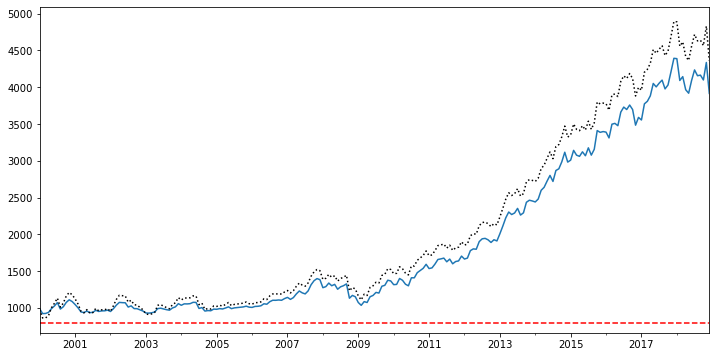

In [16]:
ind = "Beer"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

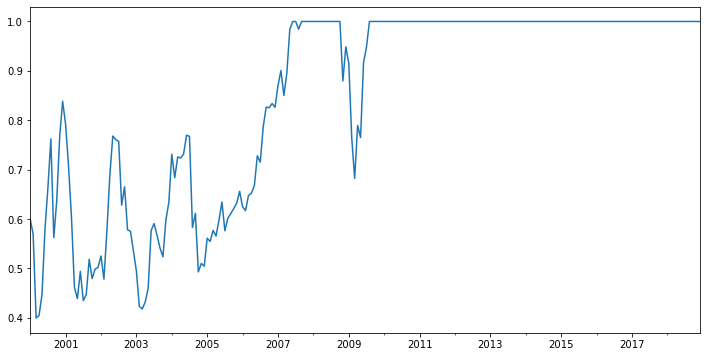

In [17]:
risky_weight_history[ind].plot(figsize=(12,6))

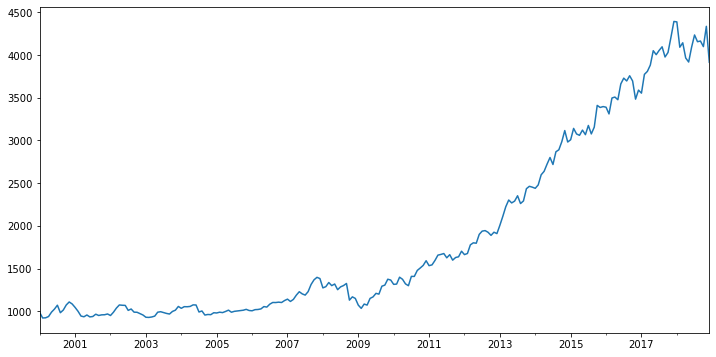

In [21]:
result = lib.run_cppi(risky_assets)
result["AccountHistory"][ind].plot(figsize=(12,6))

In [37]:
lib.summary_stats(risky_assets)

,Annualized Returns,Annualized Volatility,Skewness,Kurtosis,Max Drawdown,VAR Historic 5%,VAR Cornis-Fisher 5%,CVAR Historic 5%,Sharpe Ratio
Steel,-0.002790,0.312368,-0.326334,4.144381,-0.758017,0.140580,0.150139,0.208117,-0.104972
Fin,0.055166,0.192909,-0.533218,4.995534,-0.718465,0.090815,0.091224,0.132175,0.130456
Beer,0.080598,0.138925,-0.493545,4.173881,-0.271368,0.061100,0.063015,0.091442,0.364213


In [42]:
cppi_portfolio = lib.run_cppi(risky_assets)
lib.summary_stats(cppi_portfolio["AccountHistory"].pct_change().dropna())

,Annualized Returns,Annualized Volatility,Skewness,Kurtosis,Max Drawdown,VAR Historic 5%,VAR Cornis-Fisher 5%,CVAR Historic 5%,Sharpe Ratio
Steel,-0.005167,0.174180,-1.995143,17.110190,-0.655198,0.068080,0.091995,0.130153,-0.201901
Fin,0.040894,0.131678,-0.946504,6.051414,-0.549673,0.053808,0.065535,0.091621,0.082735
Beer,0.075544,0.115462,-0.669250,4.760879,-0.259582,0.049275,0.052923,0.074908,0.394449


In [43]:
lib.summary_stats(cppi_portfolio["RiskOnlyReturn"].pct_change().dropna())

,Annualized Returns,Annualized Volatility,Skewness,Kurtosis,Max Drawdown,VAR Historic 5%,VAR Cornis-Fisher 5%,CVAR Historic 5%,Sharpe Ratio
Steel,-0.001320,0.312973,-0.330333,4.132666,-0.758017,0.141240,0.150415,0.208117,-0.100073
Fin,0.057941,0.192986,-0.543630,5.015294,-0.718465,0.090870,0.091172,0.132175,0.144783
Beer,0.082286,0.139058,-0.502368,4.181533,-0.271368,0.061300,0.063037,0.091442,0.376001


In [46]:
cppi_portfolio = lib.run_cppi(risky_assets, drawdown=0.25)
lib.summary_stats(cppi_portfolio["AccountHistory"].pct_change().dropna())

,Annualized Returns,Annualized Volatility,Skewness,Kurtosis,Max Drawdown,VAR Historic 5%,VAR Cornis-Fisher 5%,CVAR Historic 5%,Sharpe Ratio
Steel,0.036216,0.115178,0.506758,6.033550,-0.248059,0.051095,0.044086,0.069271,0.053968
Fin,0.055683,0.089719,-0.081628,3.952747,-0.243626,0.038728,0.037748,0.052754,0.286263
Beer,0.062134,0.089464,-0.739508,4.586736,-0.161186,0.036743,0.041343,0.060777,0.359187


In [47]:
lib.summary_stats(cppi_portfolio["RiskOnlyReturn"].pct_change().dropna())

,Annualized Returns,Annualized Volatility,Skewness,Kurtosis,Max Drawdown,VAR Historic 5%,VAR Cornis-Fisher 5%,CVAR Historic 5%,Sharpe Ratio
Steel,-0.001320,0.312973,-0.330333,4.132666,-0.758017,0.141240,0.150415,0.208117,-0.100073
Fin,0.057941,0.192986,-0.543630,5.015294,-0.718465,0.090870,0.091172,0.132175,0.144783
Beer,0.082286,0.139058,-0.502368,4.181533,-0.271368,0.061300,0.063037,0.091442,0.376001


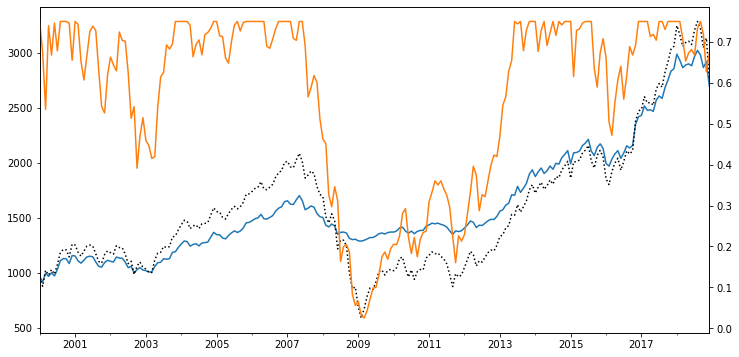

In [51]:
ind = "Fin"
ax = cppi_portfolio["AccountHistory"][ind].plot(figsize=(12,6))
cppi_portfolio["RiskOnlyReturn"][ind].plot(style="k:")
cppi_portfolio["RiskyWeightHistory"][ind].plot(secondary_y=True)